# **Numerical Solution of Ordinary Differential Equations.** Picard’s Method, Taylor series method, Euler and modified Euler method, Runge-Kutta methods.

1. Picard’s Method

Example 1: Solving dy/dx=x+y, with y(0)=1

In [1]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Function('y')(x)

# Differential equation
dy_dx = sp.Derivative(y, x) - (x + y)

# Initial condition
y0 = 1

# Picard's successive approximations
y1 = y0 + sp.integrate(x + y0, x)
y2 = y0 + sp.integrate(x + y1, x)
y3 = y0 + sp.integrate(x + y2, x)

print("First Approximation:", y1)
print("Second Approximation:", y2)
print("Third Approximation:", y3)


First Approximation: x**2/2 + x + 1
Second Approximation: x**3/6 + x**2 + x + 1
Third Approximation: x**4/24 + x**3/3 + x**2 + x + 1


1. First Approximation: Replace y in f(x,y) with y0​ and integrate.
2. Second Approximation: Substitute the first approximation into f(x,y).
3. Third Approximation: Repeat the process to obtain a better result.

2. Taylor Series Method

Example 2: Solving dy/dx = x^2 − y, with y(0)=1

In [2]:
# Define variables and function
x = sp.Symbol('x')
y = sp.Function('y')(x)

# Differential equation
dy_dx = x**2 - y

# Taylor series expansion
y0 = 1  # initial condition
y_prime = dy_dx.subs(y, y0)
y_double_prime = sp.diff(dy_dx, x) + sp.diff(dy_dx, y) * y_prime
y_triple_prime = sp.diff(y_double_prime, x) + sp.diff(y_double_prime, y) * y_prime

# Taylor series expansion around x = 0
taylor_series = y0 + y_prime * x + (y_double_prime * x**2) / 2 + (y_triple_prime * x**3) / 6
print("Taylor Series Approximation:", taylor_series)


Taylor Series Approximation: x**3*(-2*x - Derivative(y(x), (x, 2)) + 2)/6 + x**2*(-x**2 + 2*x - Derivative(y(x), x) + 1)/2 + x*(x**2 - 1) + 1


1. First Derivative: Use the given ODE to find dy/dx​.
2. Higher-Order Derivatives: Differentiate repeatedly to build the Taylor series.
3. Approximation: Use the series to estimate y for small x.

3. Euler’s Method

Example 3: Solving dy/dx=x+y, with y(0)=1

In [3]:
# Euler's Method Implementation
def euler_method(f, x0, y0, h, n):
    x, y = x0, y0
    for i in range(n):
        y += h * f(x, y)
        x += h
    return y

# Define function f(x, y)
f = lambda x, y: x + y

# Parameters
x0, y0 = 0, 1
h = 0.1  # step size
n = 10   # number of steps

approx_value = euler_method(f, x0, y0, h, n)
print(f"Approximate value at x = {x0 + n*h}: {approx_value}")


Approximate value at x = 1.0: 3.1874849202


1. Concept: Approximate the curve by small tangent steps.
2. Iteration: Update y using yn + 1 = yn + hf(xn,yn).
3. Accuracy: Small step sizes h improve the result but increase computation.

4. Modified Euler’s Method

Example 4: Solving dy/dx=x−y, with y(0)=1

In [4]:
# Modified Euler's Method Implementation
def modified_euler(f, x0, y0, h, n):
    x, y = x0, y0
    for i in range(n):
        y_predict = y + h * f(x, y)  # Predictor step
        y_correct = y + (h / 2) * (f(x, y) + f(x + h, y_predict))  # Corrector step
        y = y_correct
        x += h
    return y

# Define function f(x, y)
f = lambda x, y: x - y

# Parameters
x0, y0 = 0, 1
h = 0.2  # step size
n = 10   # number of steps

approx_value = modified_euler(f, x0, y0, h, n)
print(f"Approximate value at x = {x0 + n*h}: {approx_value}")


Approximate value at x = 2.0: 1.274896062671921


1. Predictor Step: Uses regular Euler’s method to estimate 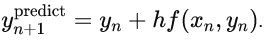
2. Corrector Step: Refines the result using the average slope:

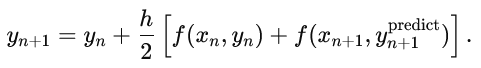

3. Improved Accuracy: Combines Euler’s simplicity with higher accuracy.

5. Runge-Kutta Methods

Example 5: Solving dy/dx=x+y, with y(0)=1 using RK4

In [5]:
# Runge-Kutta 4th Order Method (RK4) Implementation
def runge_kutta(f, x0, y0, h, n):
    x, y = x0, y0
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
    return y

# Define function f(x, y)
f = lambda x, y: x + y

# Parameters
x0, y0 = 0, 1
h = 0.1  # step size
n = 10   # number of steps

approx_value = runge_kutta(f, x0, y0, h, n)
print(f"Approximate value at x = {x0 + n*h}: {approx_value}")


Approximate value at x = 1.0: 3.436559488270332


1. Intermediate Slopes (k1, k2, k3, k4): RK4 computes four slopes:
- k1​: Initial slope.
- k2​,k3​: Midpoint slopes for better accuracy.
- k4​: Final slope.
2. Weighted Average: Combines these slopes to calculate yn+1​:
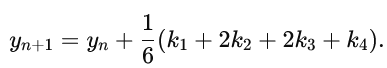

3. High Accuracy: RK4 is widely used due to its excellent balance between accuracy and computational effort.

Summary for Week 10

    Picard’s Method: Uses iterative successive approximations to solve ODEs.
    
    Taylor Series Method: Expands the solution in a power series for local accuracy.
    
    Euler’s Method: A simple first-order method that approximates solutions step by step.
    
    Modified Euler’s Method: Improves accuracy by incorporating a corrector step.
    
    Runge-Kutta Methods: Highly accurate techniques, especially RK4, for solving ODEs in fewer steps.